In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Parâmetros


In [ ]:
# Parâmetros
N = 1000000  # População total
I0 = 5  # Número inicial de indivíduos infectados
R0 = 0  # Número inicial de indivíduos recuperados
D0 = 0 # Número inicial de mortes causadas pela epidemia
S0 = N - I0 - R0 - D0  # Número inicial de indivíduos suscetíveis
beta = 0.4  # Taxa de contato
gamma = 1./7.4  # Taxa de recuperação
epsilon = 0.05 # Taxa de mortalidade
t = np.linspace(0, 720, 720)  # Grade de tempo

### Modelos Epidemiológicos

In [ ]:
# Equações diferenciais do modelo SIR.
def modelo_sird(y, t, N, beta, gamma,epsilon):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma+epsilon) * I
    dRdt = gamma * I
    dDdt = epsilon * I
    return dSdt, dIdt, dRdt, dDdt

### Métodos para Resolução de Equações Diferenciais

In [ ]:
def modelo_sird2(S, I, R, D, N, beta, gamma, epsilon):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma+epsilon) * I
    dRdt = gamma * I
    dDdt = epsilon * I
    return dSdt, dIdt, dRdt, dDdt

In [ ]:
def run_model():
    S, I, R, D = S0, I0, R0, D0
    sus, inf, rec, dead = [], [], [], []
    for time in np.arange(t[0], t[-1]):
        sus.append(S)
        inf.append(I)
        rec.append(R)
        dead.append(D)
        dSdt, dIdt, dRdt, dDdt = modelo_sird2(S, I, R, D, N, beta, gamma, epsilon)
    S += dSdt
    I += dIdt
    R += dRdt
    D += dDdt
    return S, I, R, D

In [ ]:
# Método de Runge-Kutta quarta ordem para o modelo SIR

def runge_kutta4(y, t, dt, derivs):
    y = np.array(y)  # Converte y para um array NumPy
    k1 = np.array(derivs(y, t, N, beta, gamma, epsilon))  
    k2 = np.array(derivs(y + 0.5*dt*k1, t + 0.5*dt, N, beta, gamma, epsilon))
    k3 = np.array(derivs(y + 0.5*dt*k2, t + 0.5*dt, N, beta, gamma, epsilon))
    k4 = np.array(derivs(y + dt*k3, t + dt, N, beta, gamma, epsilon))
    y_proximo = y + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y_proximo

# Método de Euler
def euler(y, t, dt, derivs):
    y_next = y + dt * np.array(derivs(y, t, N, beta, gamma, epsilon))
    return y_next

# Método do Ponto Médio
def midpoint(y, t, dt, derivs):
    k1 = dt * np.array(derivs(y, t, N, beta, gamma, epsilon))
    k2 = dt * np.array(derivs(y + k1/2, t + dt/2, N, beta, gamma, epsilon))
    y_next = y + k2
    return y_next

In [ ]:
# Vetor de condições iniciais
y0 = S0, I0, R0, D0

In [ ]:
def run_simulation_SIRD_RK(dt):
    S, I, R, D = [], [], [], []
    y = y0
    for ti in np.arange(t[0], t[-1], dt):
        S.append(y[0])
        I.append(y[1])
        R.append(y[2])
        D.append(y[3])
        y = runge_kutta4(y, ti, dt, modelo_sird)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    D = np.array(D)
    return S, I, R, D

In [ ]:
def run_simulation_SIRD_midpoint(dt):
    S, I, R, D = [], [], [], []
    y = y0
    for ti in np.arange(t[0], t[-1], dt):
        S.append(y[0])
        I.append(y[1])
        R.append(y[2])
        D.append(y[3])
        y = midpoint(y, ti, dt, modelo_sird)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    D = np.array(D)
    return S, I, R, D

In [ ]:
def run_simulation_SIRD_euler(dt):
    S, I, R, D = [], [], [], []
    y = y0
    for ti in np.arange(t[0], t[-1], dt):
        S.append(y[0])
        I.append(y[1])
        R.append(y[2])
        D.append(y[3])
        y = euler(y, ti, dt, modelo_sird)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    D = np.array(D)
    return S, I, R, D

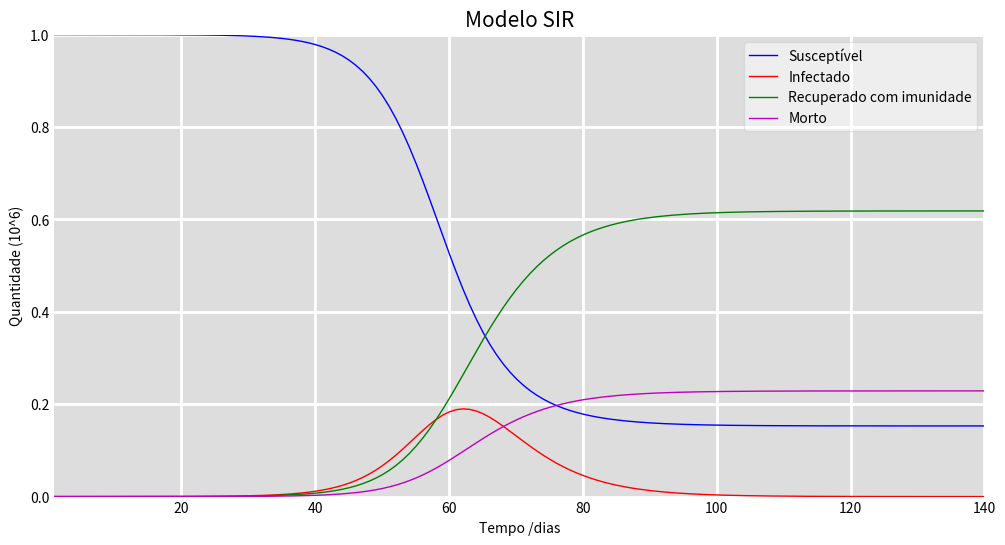

In [ ]:
def modelo_sird2(S, I, R, D, N, beta, gamma, epsilon):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma+epsilon) * I
    dRdt = gamma * I
    dDdt = epsilon * I
    return dSdt, dIdt, dRdt, dDdt

S, I, R, D = S0, I0, R0, D0
sus, inf, rec, dead = [], [], [], []
for time in t:
    sus.append(S)
    inf.append(I)
    rec.append(R)
    dead.append(D)
    dSdt, dIdt, dRdt, dDdt = modelo_sird2(S, I, R, D, N, beta, gamma, epsilon)
    S += dSdt
    I += dIdt
    R += dRdt
    D += dDdt
    
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, np.array(sus)/1000000, 'b', alpha=1, lw=1, label='Susceptível')
ax.plot(t, np.array(inf)/1000000, 'r', alpha=1, lw=1, label='Infectado')
ax.plot(t, np.array(rec)/1000000, 'g', alpha=1, lw=1, label='Recuperado com imunidade')
ax.plot(t, np.array(dead)/1000000, 'm', alpha=1, lw=1, label='Morto')
plt.title("Modelo SIR", fontsize=15, color='black') 
ax.set_xlabel('Tempo /dias')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(1,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

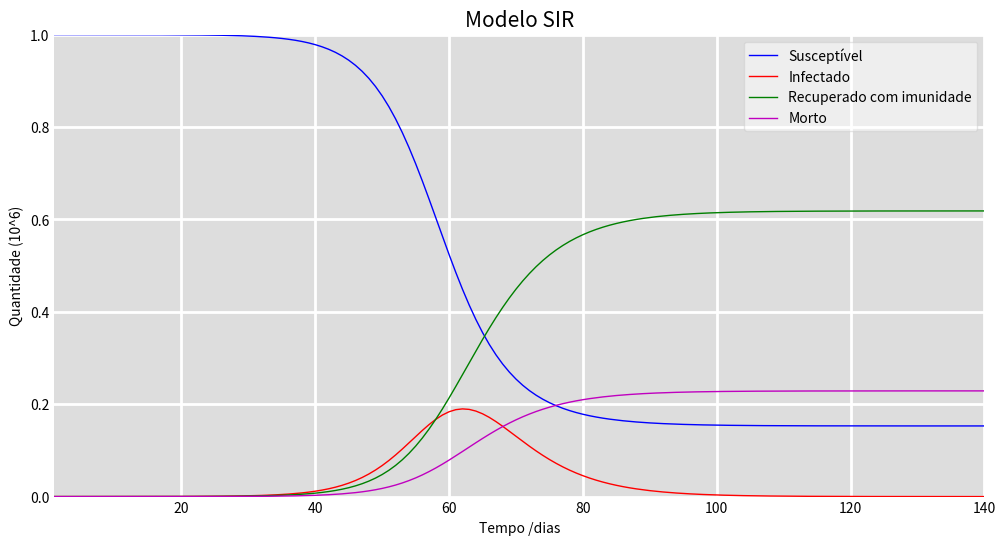

In [ ]:
def modelo_sird2(S, I, R, D, N, beta, gamma, epsilon):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma+epsilon) * I
    dRdt = gamma * I
    dDdt = epsilon * I
    return dSdt, dIdt, dRdt, dDdt

S, I, R, D = S0, I0, R0, D0
sus, inf, rec, dead = [], [], [], []
for time in t:
    sus.append(S)
    inf.append(I)
    rec.append(R)
    dead.append(D)
    dSdt, dIdt, dRdt, dDdt = modelo_sird2(S, I, R, D, N, beta, gamma, epsilon)
    S += dSdt
    I += dIdt
    R += dRdt
    D += dDdt
    
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(np.arange(t[0], t[-1]), np.array(sus)/1000000, 'b', alpha=1, lw=1, label='Susceptível')
ax.plot(np.arange(t[0], t[-1]), np.array(inf)/1000000, 'r', alpha=1, lw=1, label='Infectado')
ax.plot(np.arange(t[0], t[-1]), np.array(rec)/1000000, 'g', alpha=1, lw=1, label='Recuperado com imunidade')
ax.plot(np.arange(t[0], t[-1]), np.array(dead)/1000000, 'm', alpha=1, lw=1, label='Morto')
plt.title("Modelo SIR", fontsize=15, color='black') 
ax.set_xlabel('Tempo /dias')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(1,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

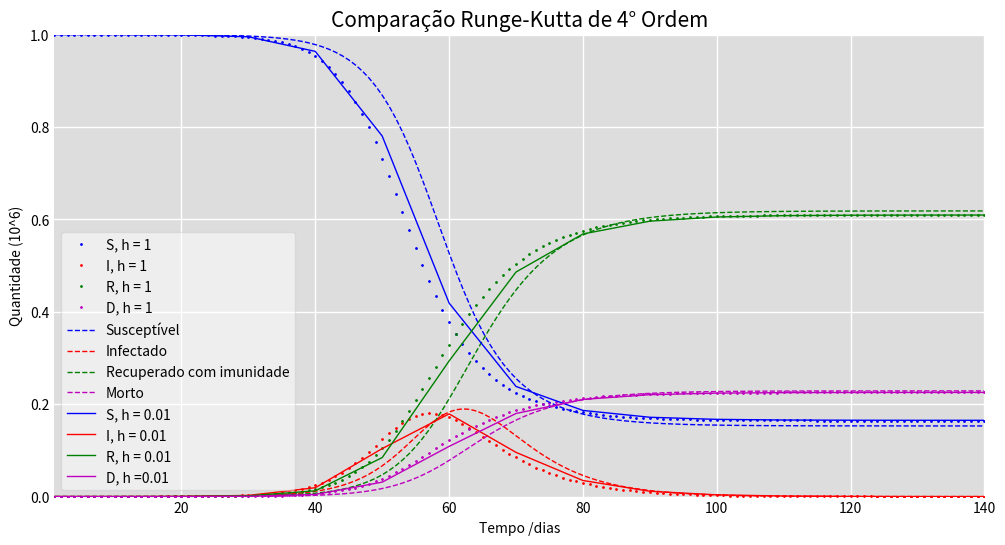

In [ ]:
# Comparação com o modelo
#Define valor dos passos utilizados
h1 = 1
#h2 = 0.5
h3 = 10
# Run simulations with two different time steps
S1, I1, R1, D1 = run_simulation_SIRD_RK(h1)
#S2, I2, R2, D2 = run_simulation_SIRD_RK(h2)
S3, I3, R3, D3 = run_simulation_SIRD_RK(h3)

def modelo_sird2(S, I, R, D, N, beta, gamma, epsilon):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma+epsilon) * I
    dRdt = gamma * I
    dDdt = epsilon * I
    return dSdt, dIdt, dRdt, dDdt

S, I, R, D = S0, I0, R0, D0
sus, inf, rec, dead = [], [], [], []
for time in t:
    sus.append(S)
    inf.append(I)
    rec.append(R)
    dead.append(D)
    dSdt, dIdt, dRdt, dDdt = modelo_sird2(S, I, R, D, N, beta, gamma, epsilon)
    S += dSdt
    I += dIdt
    R += dRdt
    D += dDdt
    
# Plot the results
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(np.arange(t[0], t[-1], h1), S1/1000000, 'b-', marker='.',markersize =2, alpha=1, lw=0, label='S, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), I1/1000000, 'r-', marker='.',markersize =2, alpha=1, lw=0,  label='I, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), R1/1000000, 'g-', marker='.',markersize =2,alpha=1, lw=0,  label='R, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), D1/1000000, 'm-', marker='.',markersize =2, alpha=1, lw=0, label='D, h = 1')

ax.plot(t, np.array(sus)/1000000, 'b--', alpha=1, lw=1, label='Susceptível')
ax.plot(t, np.array(inf)/1000000, 'r--', alpha=1, lw=1, label='Infectado')
ax.plot(t, np.array(rec)/1000000, 'g--', alpha=1, lw=1, label='Recuperado com imunidade')
ax.plot(t, np.array(dead)/1000000, 'm--', alpha=1, lw=1, label='Morto')

ax.plot(np.arange(t[0], t[-1], h3), S3/1000000,'b-', marker='v',markersize =0, alpha=1, lw=1, label='S, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), I3/1000000,'r-', marker='v',markersize =0, alpha=1, lw=1, label='I, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), R3/1000000,'g-', marker='v',markersize =0, alpha=1, lw=1, label='R, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), D3/1000000,'m-', marker='v',markersize =0, alpha=1, lw=1, label='D, h =0.01')

plt.title("Comparação Runge-Kutta de 4° Ordem", fontsize=15, color='black') 
ax.set_xlabel('Tempo /dias')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(1,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

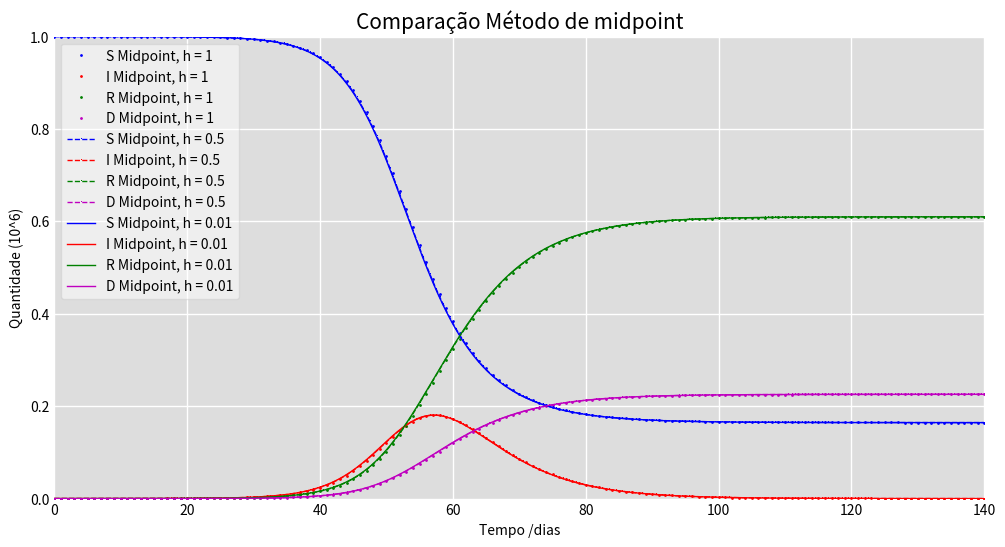

In [ ]:
#Define valor dos passos utilizados
h1 = 1
h2 = 0.5
h3 = 0.01
# Run simulations with two different time steps
S1, I1, R1, D1 = run_simulation_SIRD_midpoint(h1)
S2, I2, R2, D2 = run_simulation_SIRD_midpoint(h2)
S3, I3, R3, D3 = run_simulation_SIRD_midpoint(h3)

# Plot the results
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(np.arange(t[0], t[-1], h1), S1/1000000, 'b-', marker='.',markersize =2, alpha=1, lw=0, label='S Midpoint, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), I1/1000000, 'r-', marker='.',markersize =2, alpha=1, lw=0,  label='I Midpoint, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), R1/1000000, 'g-', marker='.',markersize =2,alpha=1, lw=0,  label='R Midpoint, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), D1/1000000, 'm-', marker='.',markersize =2, alpha=1, lw=0, label='D Midpoint, h = 1')

ax.plot(np.arange(t[0], t[-1], h2), S2/1000000, 'b--', marker=',',markersize =3, alpha=1, lw=1, label='S Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), I2/1000000, 'r--', marker=',',markersize =3, alpha=1, lw=1, label='I Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), R2/1000000, 'g--', marker=',',markersize =3, alpha=1, lw=1,label='R Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), D2/1000000, 'm--', marker=',',markersize =3,  alpha=1, lw=1, label='D Midpoint, h = 0.5')

ax.plot(np.arange(t[0], t[-1], h3), S3/1000000,'b-', marker='v',markersize =0, alpha=1, lw=1, label='S Midpoint, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), I3/1000000,'r-', marker='v',markersize =0, alpha=1, lw=1, label='I Midpoint, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), R3/1000000,'g-', marker='v',markersize =0, alpha=1, lw=1, label='R Midpoint, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), D3/1000000,'m-', marker='v',markersize =0, alpha=1, lw=1, label='D Midpoint, h = 0.01')

plt.title("Comparação Método de midpoint", fontsize=15, color='black') 
ax.set_xlabel('Tempo /dias')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(0,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

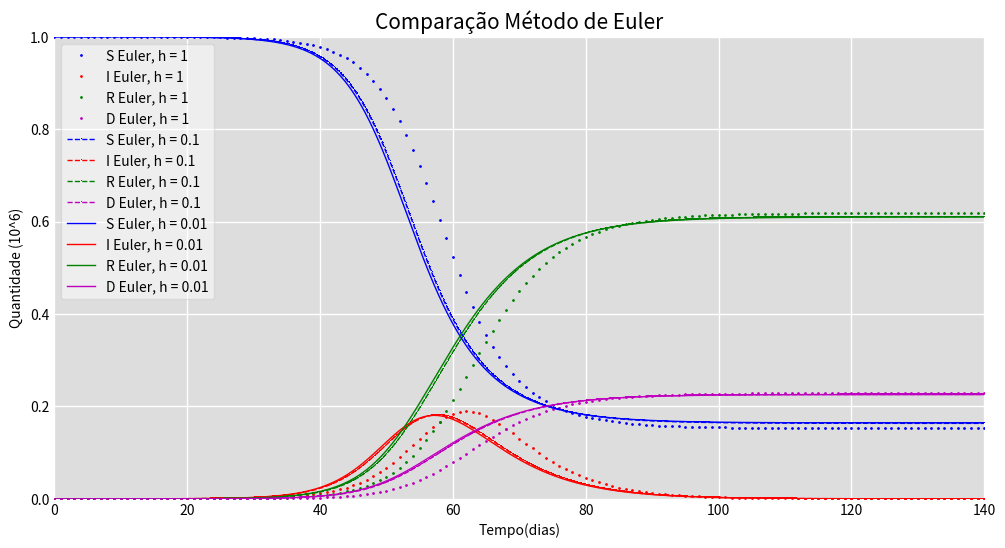

In [ ]:
#Define valor dos passos utilizados
h1 = 1
h2 = 0.1
h3 = 0.01
# Run simulations with two different time steps
S1, I1, R1, D1 = run_simulation_SIRD_euler(h1)
S2, I2, R2, D2 = run_simulation_SIRD_euler(h2)
S3, I3, R3, D3 = run_simulation_SIRD_euler(h3)

# Plot the results
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(np.arange(t[0], t[-1], h1), S1/1000000, 'b-', marker='.',markersize =2, alpha=1, lw=0, label='S Euler, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), I1/1000000, 'r-', marker='.',markersize =2, alpha=1, lw=0,  label='I Euler, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), R1/1000000, 'g-', marker='.',markersize =2,alpha=1, lw=0,  label='R Euler, h = 1')
ax.plot(np.arange(t[0], t[-1], h1), D1/1000000, 'm-', marker='.',markersize =2, alpha=1, lw=0, label='D Euler, h = 1')

ax.plot(np.arange(t[0], t[-1], h2), S2/1000000, 'b--', marker=',',markersize =3, alpha=1, lw=1, label='S Euler, h = 0.1')
ax.plot(np.arange(t[0], t[-1], h2), I2/1000000, 'r--', marker=',',markersize =3, alpha=1, lw=1, label='I Euler, h = 0.1')
ax.plot(np.arange(t[0], t[-1], h2), R2/1000000, 'g--', marker=',',markersize =3, alpha=1, lw=1,label='R Euler, h = 0.1')
ax.plot(np.arange(t[0], t[-1], h2), D2/1000000, 'm--', marker=',',markersize =3,  alpha=1, lw=1, label='D Euler, h = 0.1')

ax.plot(np.arange(t[0], t[-1], h3), S3/1000000,'b-', marker='v',markersize =0, alpha=1, lw=1, label='S Euler, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), I3/1000000,'r-', marker='v',markersize =0, alpha=1, lw=1, label='I Euler, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), R3/1000000,'g-', marker='v',markersize =0, alpha=1, lw=1, label='R Euler, h = 0.01')
ax.plot(np.arange(t[0], t[-1], h3), D3/1000000,'m-', marker='v',markersize =0, alpha=1, lw=1, label='D Euler, h = 0.01')

plt.title("Comparação Método de Euler", fontsize=15, color='black') 
ax.set_xlabel('Tempo(dias)')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(0,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

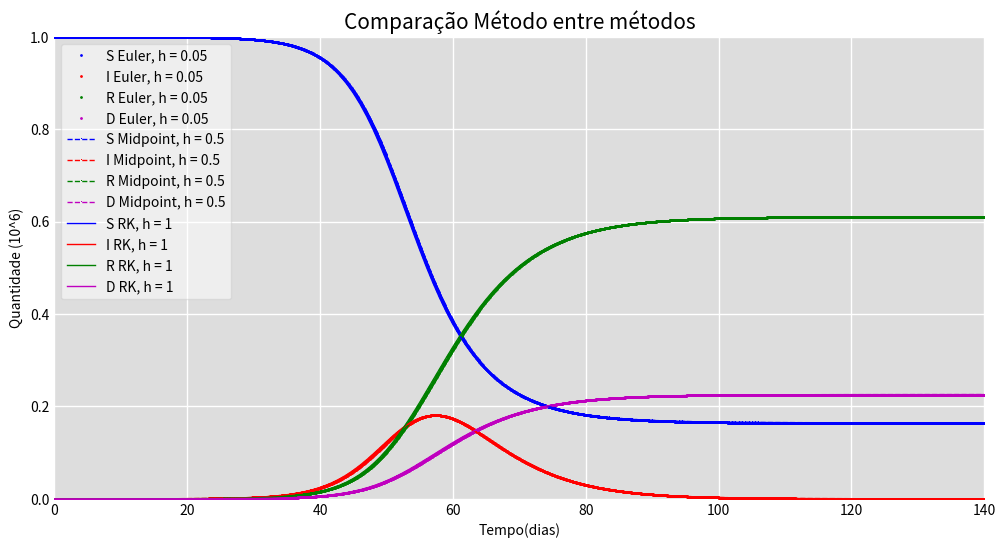

In [ ]:
#Define valor dos passos utilizados
h1 = 0.05
h2 = 0.5
h3 = 1
# Run simulations with two different time steps
S1, I1, R1, D1 = run_simulation_SIRD_euler(h1)
S2, I2, R2, D2 = run_simulation_SIRD_midpoint(h2)
S3, I3, R3, D3 = run_simulation_SIRD_RK(h3)

# Plot the results
fig = plt.figure(facecolor='w',figsize=(12, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(np.arange(t[0], t[-1], h1), S1/1000000, 'b-', marker='.',markersize =2, alpha=1, lw=0, label='S Euler, h = 0.05')
ax.plot(np.arange(t[0], t[-1], h1), I1/1000000, 'r-', marker='.',markersize =2, alpha=1, lw=0,  label='I Euler, h = 0.05')
ax.plot(np.arange(t[0], t[-1], h1), R1/1000000, 'g-', marker='.',markersize =2,alpha=1, lw=0,  label='R Euler, h = 0.05')
ax.plot(np.arange(t[0], t[-1], h1), D1/1000000, 'm-', marker='.',markersize =2, alpha=1, lw=0, label='D Euler, h = 0.05')

ax.plot(np.arange(t[0], t[-1], h2), S2/1000000, 'b--', marker=',',markersize =3, alpha=1, lw=1, label='S Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), I2/1000000, 'r--', marker=',',markersize =3, alpha=1, lw=1, label='I Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), R2/1000000, 'g--', marker=',',markersize =3, alpha=1, lw=1,label='R Midpoint, h = 0.5')
ax.plot(np.arange(t[0], t[-1], h2), D2/1000000, 'm--', marker=',',markersize =3,  alpha=1, lw=1, label='D Midpoint, h = 0.5')

ax.plot(np.arange(t[0], t[-1], h3), S3/1000000,'b-', marker='v',markersize =0, alpha=1, lw=1, label='S RK, h = 1')
ax.plot(np.arange(t[0], t[-1], h3), I3/1000000,'r-', marker='v',markersize =0, alpha=1, lw=1, label='I RK, h = 1')
ax.plot(np.arange(t[0], t[-1], h3), R3/1000000,'g-', marker='v',markersize =0, alpha=1, lw=1, label='R RK, h = 1')
ax.plot(np.arange(t[0], t[-1], h3), D3/1000000,'m-', marker='v',markersize =0, alpha=1, lw=1, label='D RK, h = 1')

plt.title("Comparação Método entre métodos", fontsize=15, color='black') 
ax.set_xlabel('Tempo(dias)')
ax.set_ylabel('Quantidade (10^6)')
ax.set_ylim(0,1)
ax.set_xlim(0,140)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()